<h2>Dengesiz Veri Seti</h2>

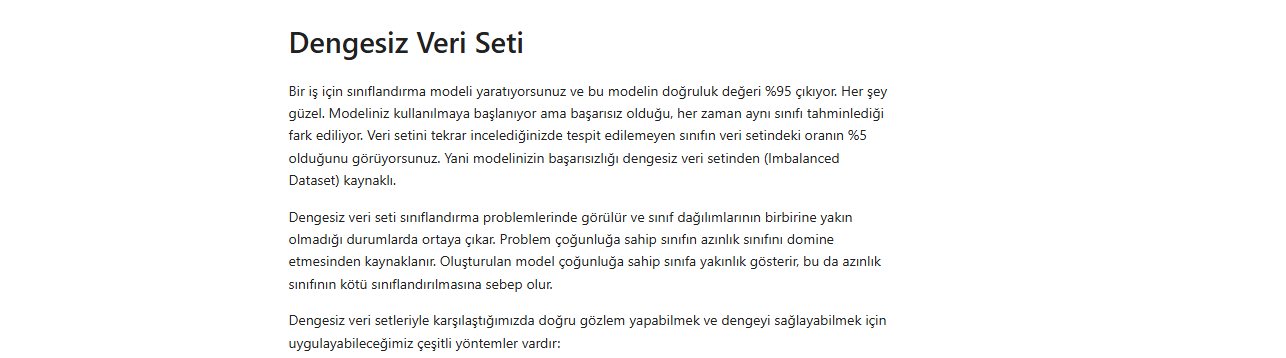

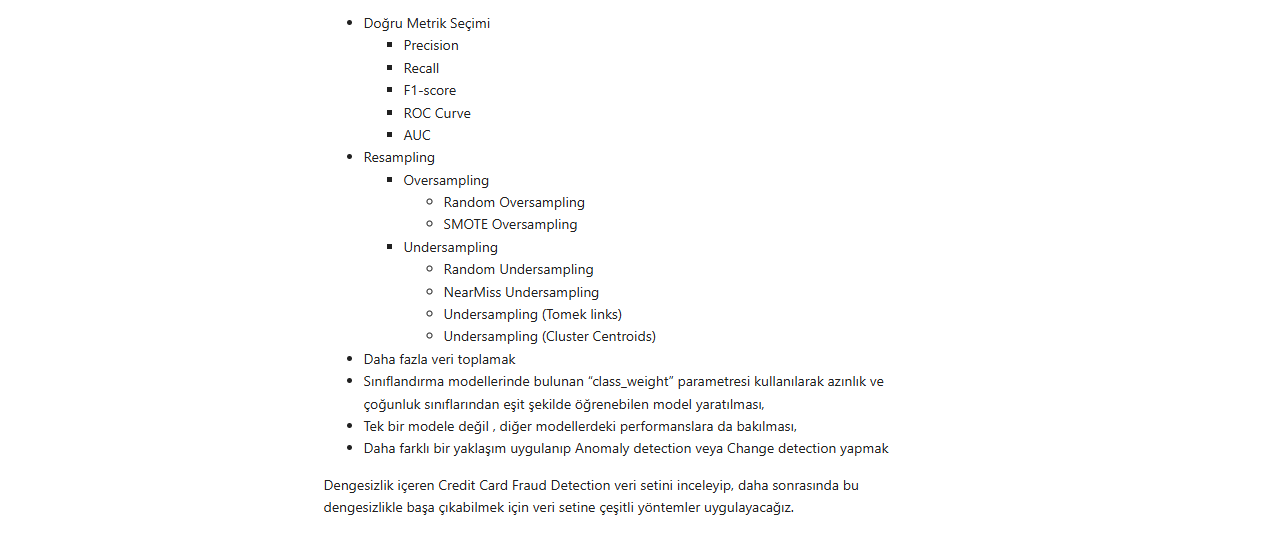

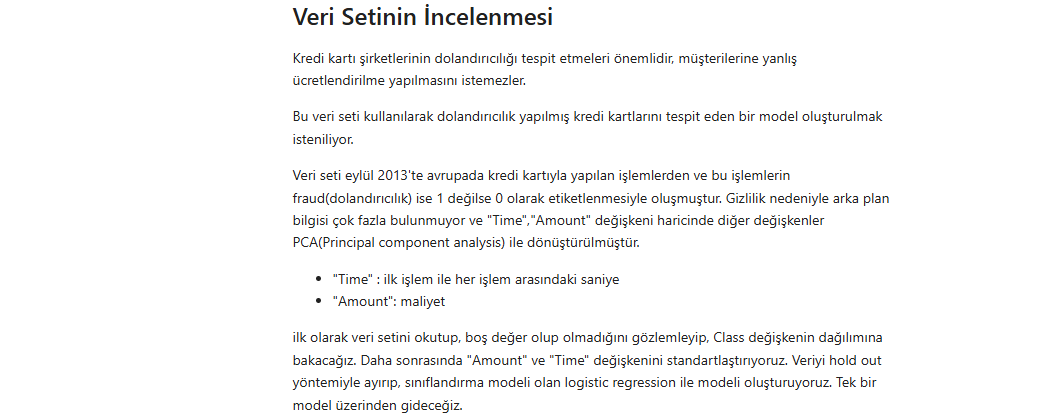

In [ ]:
# Gerekli kütüphaneler
import pandas as pd
import numpy as np
from sklearn.preprocessing import RobustScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report,f1_score,recall_score,roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rc,rcParams
import itertools

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
warnings.filterwarnings("ignore", category=FutureWarning) 
warnings.filterwarnings("ignore", category=UserWarning)

In [ ]:
# Veri setinin okutulması
df = pd.read_csv("creditcard.csv")
df.head()

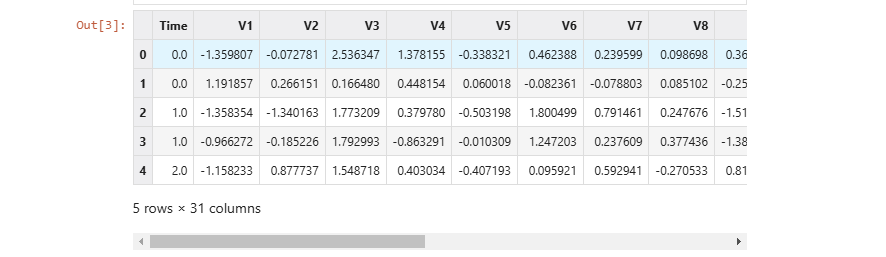

In [ ]:
# veri setindeki değişkenlerin tiplerini ve boş değer içerip içermediğini gözlemlemek istiyoruz
df.info()

In [ ]:
# 1 sınıfının veri setinde bulunma oranı %0.2, 0 sınıfının ise %99.8
f,ax=plt.subplots(1,2,figsize=(18,8))
df['Class'].value_counts().plot.pie(explode=[0,0.1],autopct='%1.1f%%',ax=ax[0],shadow=True)
ax[0].set_title('dağılım')
ax[0].set_ylabel('')
sns.countplot('Class',data=df,ax=ax[1])
ax[1].set_title('Class')
plt.show()


In [ ]:
# Time ve Amount değişkenlerini standartlaştırma
rob_scaler = RobustScaler()
df['Amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1,1))
df['Time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1,1))
df.head()

In [ ]:


# Hold out yöntemi uygulayıp veri setini eğitim ve test olarak ikiye ayırıyoruz.(%80,%20)
X = df.drop("Class", axis=1)
y = df["Class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=123456)

In [ ]:
# modelin tanımlanıp, eğitilmesi ve başarı skoru
model = LogisticRegression(random_state=123456)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f"%(accuracy))

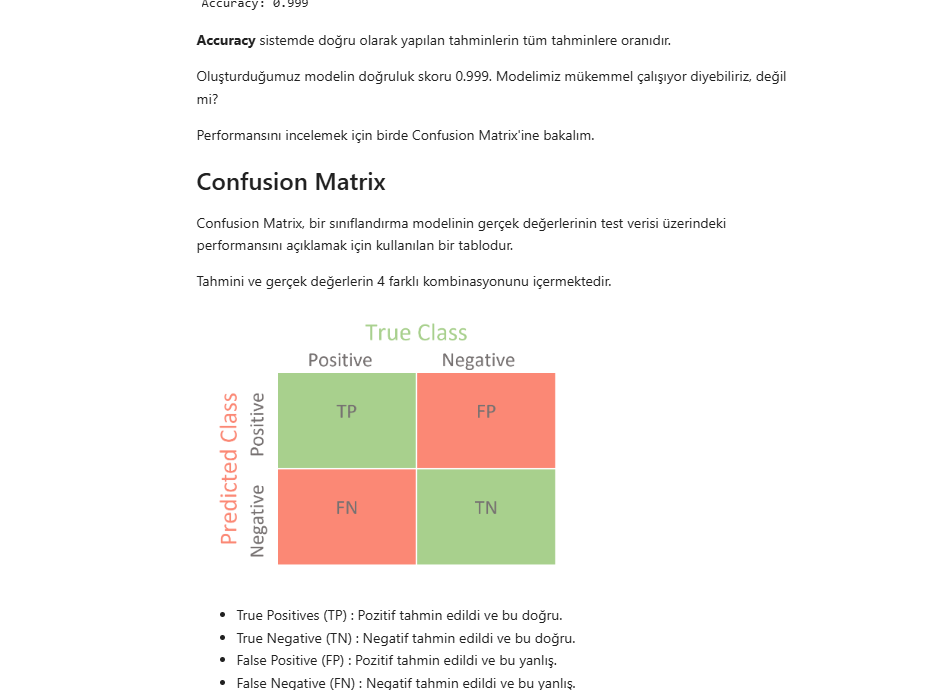

In [ ]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):

    plt.rcParams.update({'font.size': 19})
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title,fontdict={'size':'16'})
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45,fontsize=12,color="blue")
    plt.yticks(tick_marks, classes,fontsize=12,color="blue")
    rc('font', weight='bold')
    fmt = '.1f'
    thresh = cm.max()
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="red")

    plt.ylabel('True label',fontdict={'size':'16'})
    plt.xlabel('Predicted label',fontdict={'size':'16'})
    plt.tight_layout()

plot_confusion_matrix(confusion_matrix(y_test, y_pred=y_pred), classes=['Non Fraud','Fraud'],
                      title='Confusion matrix')

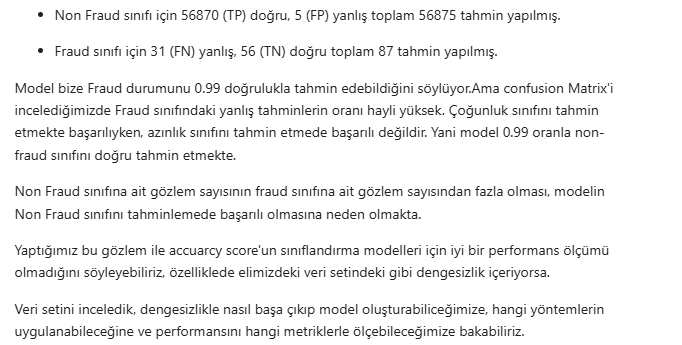

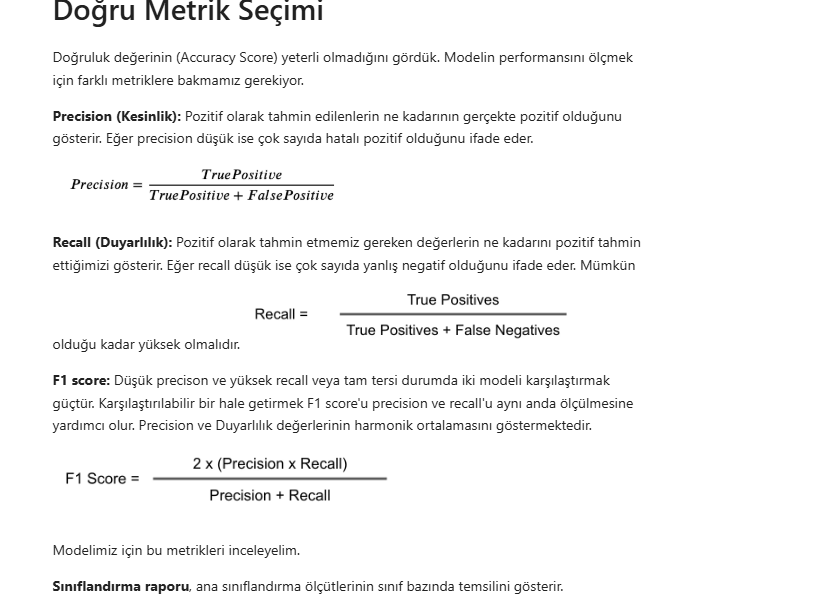

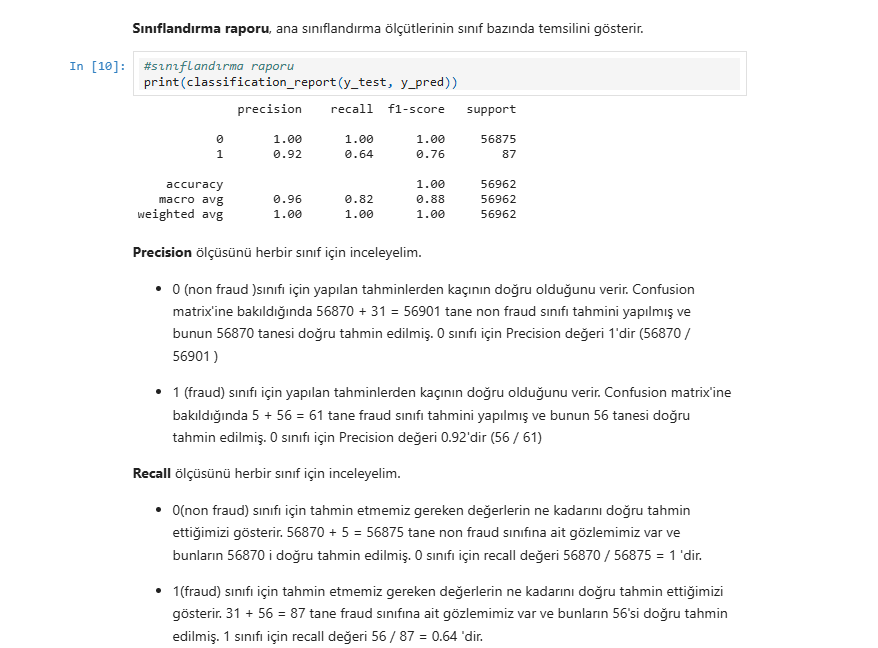

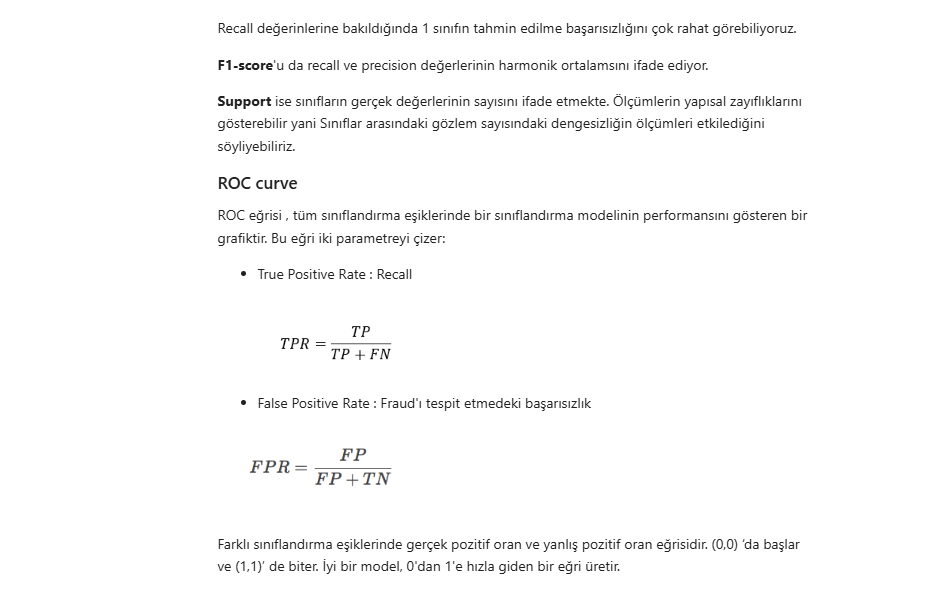

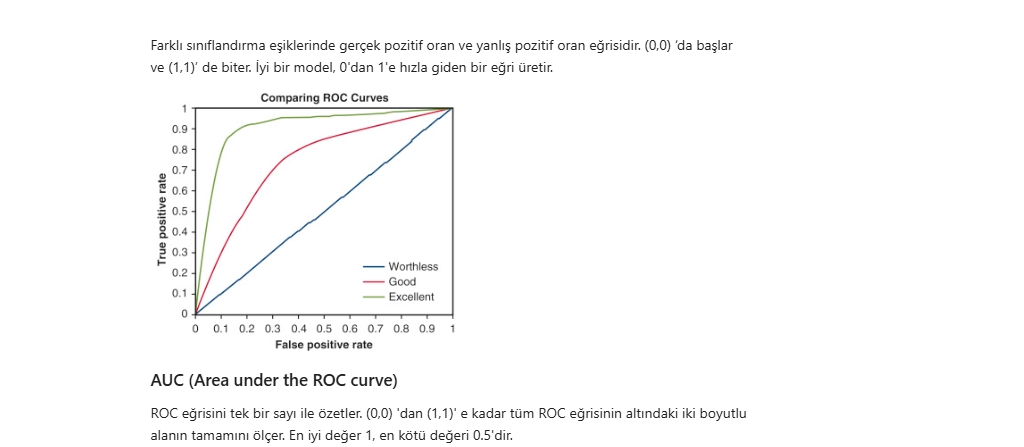

# Auc Roc Curve
def generate_auc_roc_curve(clf, X_test):
    y_pred_proba = clf.predict_proba(X_test)[:, 1]
    fpr, tpr, thresholds = roc_curve(y_test,  y_pred_proba)
    auc = roc_auc_score(y_test, y_pred_proba)
    plt.plot(fpr,tpr)
    plt.show()
    pass

generate_auc_roc_curve(model, X_test)

In [ ]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
auc = roc_auc_score(y_test, y_pred_proba)
print("AUC ROC Curve with Area Under the curve = %.3f"%auc)

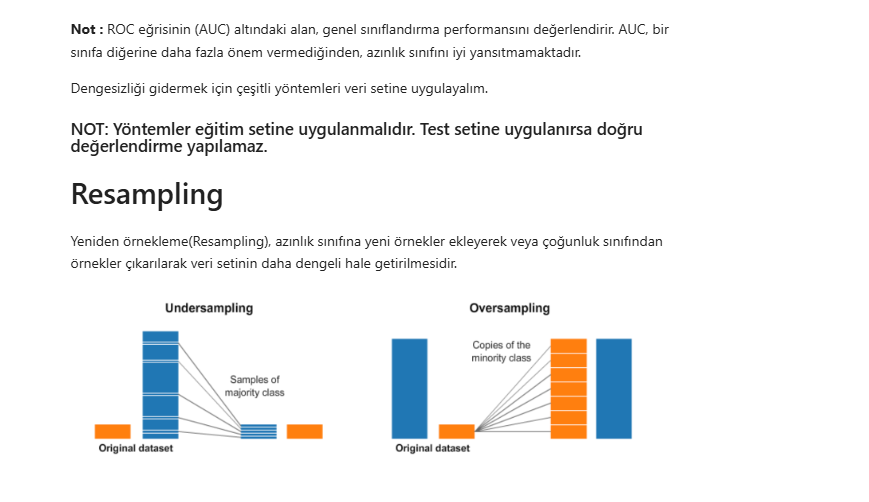

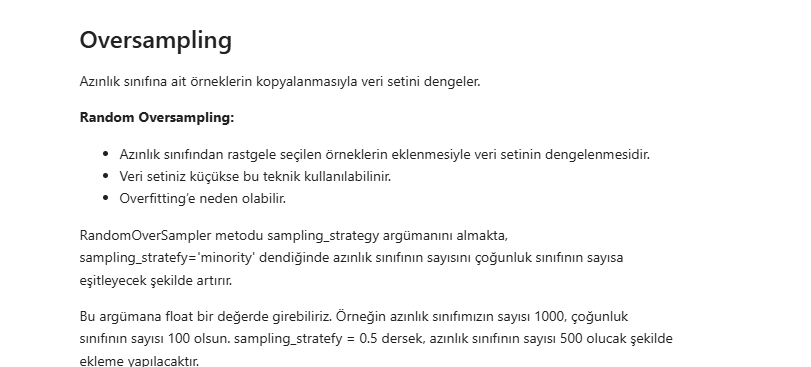

# random oversampling önce eğitim setindeki sınıf sayısı
y_train.value_counts()
0    227440
1       405
Name: Class, dtype: int64
# RandomOver Sampling uygulanması (Eğitim setine uygulanıyor)
from imblearn.over_sampling import RandomOverSampler
oversample = RandomOverSampler(sampling_strategy='minority')
X_randomover, y_randomover = oversample.fit_resample(X_train, y_train)
# random oversampling den sonra eğitim setinin sınıf sayısı
y_randomover.value_counts()
1    227440
0    227440
Name: Class, dtype: int64
# modelin eğitilmesi ve başarı oranı
model.fit(X_randomover, y_randomover)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f%%" % (accuracy))
Accuracy: 0.977%
plot_confusion_matrix(confusion_matrix(y_test, y_pred=y_pred), classes=['Non Fraud','Fraud'],
                      title='Confusion matrix')

#sınıflandırma raporu
print(classification_report(y_test, y_pred))

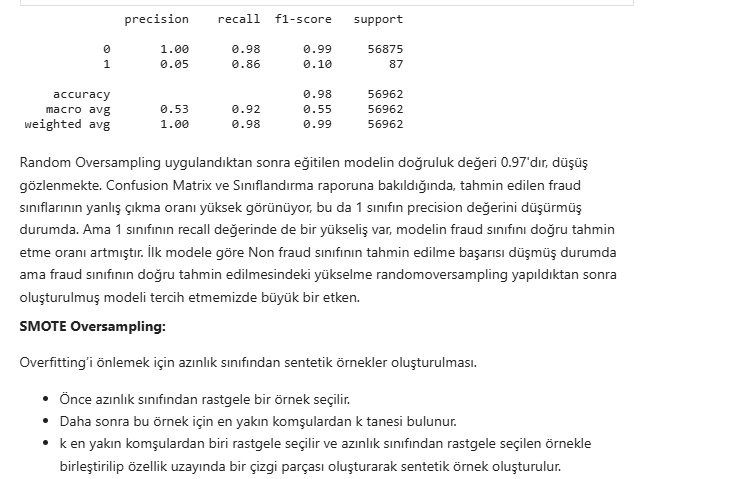

In [ ]:
# smote dan önce eğitim setindeki sınıf sayısı
y_train.value_counts()

In [ ]:
# Smote uygulanması (Eğitim setine uygulanıyor)
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_smote, y_smote = oversample.fit_resample(X_train, y_train)

In [ ]:
# smote dan sonra eğitim setinin sınıf sayısı
y_smote.value_counts()

In [ ]:
# modelin eğitilmesi ve başarı oranı
model.fit(X_smote, y_smote)
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: %.3f%%" % (accuracy))

In [ ]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred=y_pred), classes=['Non Fraud','Fraud'],
                      title='Confusion matrix')

In [ ]:
plot_confusion_matrix(confusion_matrix(y_test, y_pred=y_pred), classes=['Non Fraud','Fraud'],
                      title='Confusion matrix')

#sınıflandırma raporu
print(classification_report(y_test, y_pred))

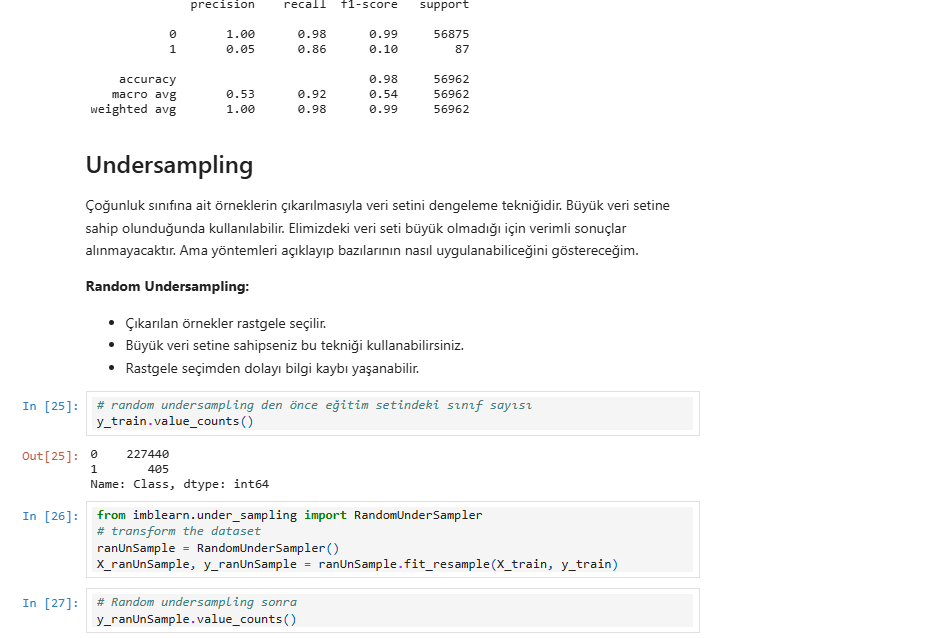

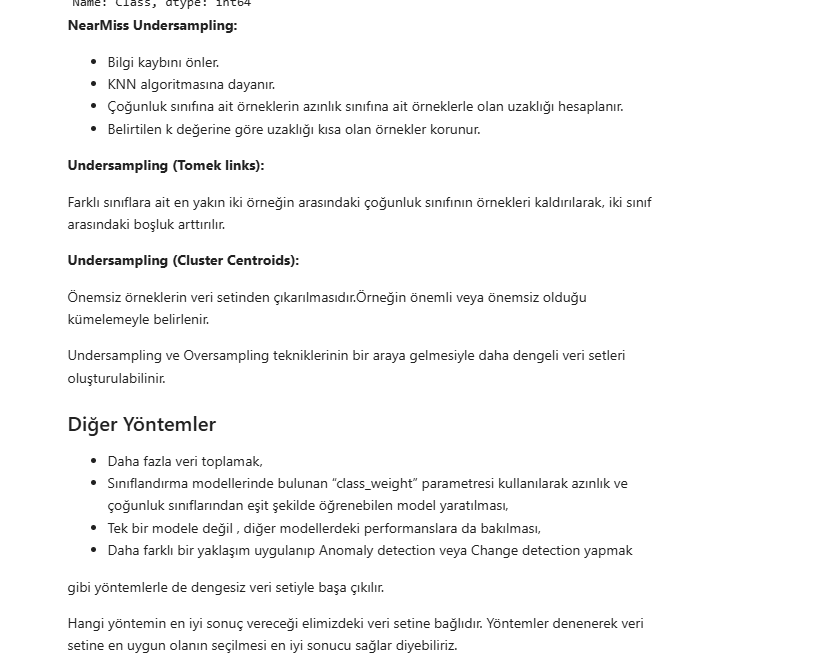

REFERANS

https://machinelearningmastery.com/random-oversampling-and-undersampling-for-imbalanced-classification/


https://machinelearningmastery.com/smote-oversampling-for-imbalanced-classification/


https://towardsdatascience.com/understanding-confusion-matrix-a9ad42dcfd62


https://towardsdatascience.com/understanding-auc-roc-curve-68b2303cc9c5

https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/
 